# Location estimation using RSSI of wireless LAN

---


## Team C-LAMP

### Team Members

| Name                  | Designation               | Organisation                                                     |Email   |
| -------------         | -------------             | -------------                                                    |--------|
| Mr. Suresh V          | Associate Director        |CDAC Pune                                                         |sureshv@cdac.in|
| Mr. Anil Kumar Gupta  | Associate Director        |CDAC Pune                                                         |anilg@cdac.in|
| Ms. Irene S.          | Joint Director            |CDAC Chennai                                                      |irenes@cdac.in|
| Mr. Pradeep Kumar CH  | Senior Technical Officer  |CDAC Pune                                                         |chpradeep@cdac.in|
| Mr. Chirantan Ganguly | CDAC Research Intern      |Institute of Radio Physics and Electronics, University of Calcutta|chirantanganguly01@gmail.com|
| Mr. Sagnik Nayak      | CDAC Research Intern      |Institute of Radio Physics and Electronics, University of Calcutta|sagniknayak2608@gmail.com|


## Introduction

In this project, our aim is to build a model to predict location of nodes based on RSSI readings from Access Points. The data for the project was provided by RISING, Japan for the problem ITU-ML5G-PS-016: Location estimation using RSSI of wireless LAN - organied as a part of the "ITU AI/ML in 5G Challenge: applying machine learning in communication networks". 

This project is divided into the following phases: 

- Phase 1: Emphasis is given on data preprocessing and exploration ,which will be covered in this report. Following this  the data and its attributes are described. Following this data preprocessing and transformation is done to efficiently fit the developed models. 
- Phase 2: Prediction model building is covered in this phase of the project.

##Background about RSSI

- RSSI is ten times the logarithm of the ratio of power of the received signal and a reference power.

- Power dissipates from a point source as it moves further out and the relationship between power and distance is that power is inversely proportional to the square of the distance travelled.

- A direct theoretical relationship exist between  RSSI and distance:

![picture](https://drive.google.com/uc?export=view&id=12XO_0vM6vPGa6agCAS1LZz9pKcncC2Qo)
- With the distance of an unknown point known from a set of known points, its location can be estimated.

- RSSI based technique is especially popular among researchers as it is readily available and no extra hardware is required.

##Established Localization Techniques
### Multilateration:

If we can calculate the distance of a point from a set of 3 or more points whose location is known, we can localize the unknown point.

In our scenario we have the following known parameters:
- Location of the four APs (xi ,yi)
- RSSI value measured at AP

The following parameters are unknown and we must figure them out to undertake localization:
- Distance of the RP from each AP (di)
- Location of the RP (x,y)

#### Distance measurement from RSSI:

![picture](https://drive.google.com/uc?export=view&id=16ecbVE7V268iBYHac_lqeXCmqJ7h_PyV)

As RSSI conveys information about strength of received signal, a relationship exists between RSSI and distance.

![picture](https://drive.google.com/uc?export=view&id=1XYuJUX8YZ5vXUk4yKh9xPSBUcUGzR2Ml)

n – Path loss Index (depends on Transmission environment)

A - Average measured RSSI when the AP is 1 meter away from RP

n, A can be found by proper experimentation in the environment.


### RSSI Fingerprinting:

In this method we directly estimate the location of the reference point without calculating its distance from the access point.

#### Precondition for using Fingerprinting:
Presence of large number of Reference Points in the 
training dataset, uniformly spread throughout the area.

![picture](https://drive.google.com/uc?export=view&id=1NYhib1j62fNa1BX2s_KLrywh8pjZmg_u)

#### Algorithms used for fingerprinting technique:
  k-Nearest Neighbour.

#### Advantages of using fingerprinting technique:
High Accuracy in localization.

#### Disadvantages of using fingerprinting technique:
- Thorough Training phase required.
- Sensitive to changes in Environment

##Dataset

The provided data sets consist of the following files:

1. AP_info.csv: CSV file providing the location (Latitude, Longitude) and environmental specification for a set of 4 access points (hereby referred to as APs).
2. training_dataset.csv: CSV file providing us with the data acquired from four APs to be used for training the model. 
    
    Data includes :
    - TimeStamp(UNIX)	
    - Latitude	of Reference Point
    - Longitude	of Reference Point
    - SSID of Access Point
    - Channel	
    - RSSI(dBm)

  Data from 13 unique reference points are present in this dataset.

3. verification_dataset.csv: CSV file providing us with the data acquired from the four APs to be used for testing the model. 
    
    Data includes :
    - TimeStamp(UNIX)	
    - Latitude	of Reference Point
    - Longitude	of Reference Point
    - SSID of Access Point
    - Channel	
    - RSSI(dBm)

  Data from 13 unique reference points are present in this dataset.

The data in the datasets training_dataset.csv and  verification_dataset.csv have been collected from the same set of 4 APs at identical location.

The data set also contains a timestamp on when the RSSI readings of the 4 APs was made. The each data set has 5200 observations.

A map of the reference and the access points was provided with the dataset, as shown below:

![picture](https://drive.google.com/uc?export=view&id=1UoF4iMbTNJ_323xPSADQPs_qTEKl5nSm)


##Data Pre-processing

### Preliminaries

The following Python packages were used in this project.

```
import numpy
import pandas 
import tensorflow 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
```
A short mentioning of the used packages:

- numpy has been used for high-level mathematical functions
- pandas has been mainly used for data manipulation and analysis.
- tensorflow was used for training and inference of deep neural networks.
- sklearn has many inbuilt functions containing various classification and regression algorithms which were used in this project
- matplotlib was used in plotting various kinds of graphs and charts



In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
import seaborn as sns
import os
import time
cwd = os.getcwd()
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Storing the path names

In [2]:
AP_train_path='/content/drive/MyDrive/CDAC/RSSI Dataset Grand Finale/AP_info.csv'
Wifi_train_path ='/content/drive/MyDrive/CDAC/RSSI Dataset Grand Finale/training_dataset.csv'
Wifi_test_path ='/content/drive/MyDrive/CDAC/RSSI Dataset Grand Finale/verification_dataset.csv'

Reading the csv files and storing in form of dataset

In [3]:
AP_train=pd.read_csv(AP_train_path)

Transforming the categorical data to numerical ones using one-hot-encoding

In [4]:
AP_train = pd.concat([AP_train,pd.get_dummies(AP_train['Indoor/Outdoor'])['Outdoor']], axis=1, join='inner').drop(columns=['Indoor/Outdoor'])

Let us have a look at the AP provided information

In [5]:
AP_train

,AP SSID,Latitude,Longitude,Hight Difference(m),Outdoor
0,1,35.157320,136.926447,0,1
1,2,35.157347,136.926807,0,1
2,3,35.157202,136.926827,0,1
3,4,35.157165,136.926470,0,1


In [6]:
AP_train = AP_train.astype({"Latitude":'float64',"Longitude":'float64',"Hight Difference(m)":'float64'})

Reading the measured data from the APs from training_dataset.csv and verification_dataset.csv and storing them inform of datasets.

In [7]:
train = pd.read_csv(Wifi_train_path)
test = pd.read_csv(Wifi_test_path)

In [8]:
train.drop(columns=['No.'], inplace=True)
test.drop(columns=['No.'], inplace=True)

Having a look at the datasets:

In [9]:
train

,TimeStamp(UNIX),Latitude,Longitude,SSID,Channel,RSSI(dBm)
0,1631687696,35.157140,136.926306,1,11,-41
1,1631687697,35.157140,136.926306,1,11,-41
2,1631687697,35.157140,136.926306,1,11,-41
3,1631687697,35.157140,136.926306,1,11,-41
4,1631687697,35.157140,136.926306,1,11,-41
...,...,...,...,...,...,...
5195,1631688763,35.157236,136.926489,4,1,-52
5196,1631688763,35.157236,136.926489,4,1,-52
5197,1631688763,35.157236,136.926489,4,1,-52
5198,1631688763,35.157236,136.926489,4,1,-52


In [10]:
test

,TimeStamp(UNIX),Latitude,Longitude,SSID,Channel,RSSI(dBm)
0,1631689137,35.157261,136.926465,1,11,-41
1,1631689137,35.157261,136.926465,1,11,-41
2,1631689138,35.157261,136.926465,1,11,-41
3,1631689138,35.157261,136.926465,1,11,-41
4,1631689138,35.157261,136.926465,1,11,-41
...,...,...,...,...,...,...
5195,1631691291,35.157298,136.926575,4,1,-59
5196,1631691291,35.157298,136.926575,4,1,-59
5197,1631691291,35.157298,136.926575,4,1,-59
5198,1631691291,35.157298,136.926575,4,1,-59


Removing the duplicate data present :

In [11]:
train.drop_duplicates(subset=['TimeStamp(UNIX)','Latitude','Longitude','SSID','RSSI(dBm)'],keep='first',inplace=True)
test.drop_duplicates(subset=['TimeStamp(UNIX)','Latitude','Longitude','SSID','RSSI(dBm)'],keep='first',inplace=True)
train.reset_index(inplace=True, drop=True)
test.reset_index(inplace=True, drop=True)

Merging the information of APs with the training and testing data:

In [12]:
train_semi = train.merge(AP_train, how='inner', left_on='SSID', right_on='AP SSID').drop(columns=['AP SSID'])
test_semi = test.merge(AP_train, how='inner', left_on='SSID', right_on='AP SSID').drop(columns=['AP SSID'])

Renaming the columns to make it more comprehensible

In [13]:
train_semi.rename(columns = {'Latitude_x':'Latitude_OP','Longitude_x':'Longitude_OP', 'Latitude_y':'Latitude_AP', 'Longitude_y':'Longitude_AP'},inplace=True)
test_semi.rename(columns = {'Latitude_x':'Latitude_OP','Longitude_x':'Longitude_OP', 'Latitude_y':'Latitude_AP', 'Longitude_y':'Longitude_AP'},inplace=True)

As according to the research done in this domain, there is a clear cut relationship between RSSI and euclidean distance between the AP and the reference point (as shown in the formula below), hence we add a feature of the same.

![picture](https://drive.google.com/uc?export=view&id=15tuh-QXcKEVx1P8EW9MuWRd_lJlTpywg)

In [14]:
def euclidean_dist(lat_op, long_op, lat_ap, long_ap, height):
  return (((lat_op - lat_ap)*111000)**2 + ((long_op - long_ap)*111000)**2 + height**2)**0.5

Since, we observe a significant variation in the provided RSSI data values (possibly due to multipath fading), we added a Moving Average of RSSI feature to smoothen the sudden variations in data.

In [15]:
def moving_average(inp):
  moving_avg=list(inp["RSSI(dBm)"][:4])
  i = 0
  window_size=50
  while i < len(list(inp["RSSI(dBm)"])) - window_size + 1:
      this_window = list(inp["RSSI(dBm)"][i : i + window_size])
      window_average = sum(this_window) / window_size
      moving_avg.append(window_average)
      i += 1
  for z in range(len(list(inp["RSSI(dBm)"]))-len(moving_avg)):
    moving_avg.append(moving_avg[-1])
  return moving_avg

In [16]:
train_semi['Distance'] = train_semi.apply(lambda row: euclidean_dist(row['Latitude_OP'],row['Longitude_OP'],row['Latitude_AP'],row['Longitude_AP'],row['Hight Difference(m)']),axis=1)
test_semi['Distance'] = test_semi.apply(lambda row: euclidean_dist(row['Latitude_OP'],row['Longitude_OP'],row['Latitude_AP'],row['Longitude_AP'],row['Hight Difference(m)']),axis=1)

In [17]:
train_semi = pd.concat([train_semi,pd.DataFrame(moving_average(train_semi), columns = ['Moving Average (RSSI)'])], axis=1)
test_semi = pd.concat([test_semi,pd.DataFrame(moving_average(test_semi), columns = ['Moving Average (RSSI)'])], axis=1)

In [18]:
final_train = train_semi.copy()
final_test = test_semi.copy()

In [19]:
 train_semi.drop_duplicates(subset=['TimeStamp(UNIX)','Latitude_OP','Longitude_OP','RSSI(dBm)'])

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,SSID,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI)
0,1631687696,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.00
1,1631687697,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.00
2,1631687698,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.00
3,1631687699,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.00
4,1631687700,35.157140,136.926306,1,11,-41,35.157320,136.926447,0.0,1,25.439033,-42.16
...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1631688759,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-58.24
1072,1631688760,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-58.24
1073,1631688761,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-58.24
1074,1631688762,35.157236,136.926489,4,1,-52,35.157165,136.926470,0.0,1,8.152950,-58.24


In [20]:
train["RSSI_AAA001"] = np.where(train['SSID'] == 1, train["RSSI(dBm)"], "")
train["RSSI_AAA002"] = np.where(train['SSID'] == 2, train["RSSI(dBm)"], "")
train["RSSI_AAA003"] = np.where(train['SSID'] == 3, train["RSSI(dBm)"], "")
train["RSSI_AAA004"] = np.where(train['SSID'] == 4, train["RSSI(dBm)"], "")

In [21]:
train.drop(['SSID','RSSI(dBm)'],axis=1,inplace=True)

In [22]:
train_semi = pd.concat([train_semi,pd.get_dummies(train_semi['SSID'])], axis=1, join='inner').drop(columns=['SSID'])
test_semi = pd.concat([test_semi,pd.get_dummies(test_semi['SSID'])], axis=1, join='inner').drop(columns=['SSID'])

Data restructuring:

Data restructuring is an essential step of data preprocessing. 
We are changing the structure of the data provided to us by creating a  combination of AP and RP features, to suit model training.

In [23]:
train_semi

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI),1,2,3,4
0,1631687696,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.00,1,0,0,0
1,1631687697,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.00,1,0,0,0
2,1631687698,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.00,1,0,0,0
3,1631687699,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-41.00,1,0,0,0
4,1631687700,35.157140,136.926306,11,-41,35.157320,136.926447,0.0,1,25.439033,-42.16,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1071,1631688759,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-58.24,0,0,0,1
1072,1631688760,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-58.24,0,0,0,1
1073,1631688761,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-58.24,0,0,0,1
1074,1631688762,35.157236,136.926489,1,-52,35.157165,136.926470,0.0,1,8.152950,-58.24,0,0,0,1


In [24]:
test_semi

,TimeStamp(UNIX),Latitude_OP,Longitude_OP,Channel,RSSI(dBm),Latitude_AP,Longitude_AP,Hight Difference(m),Outdoor,Distance,Moving Average (RSSI),1,2,3,4
0,1631689137,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.00,1,0,0,0
1,1631689138,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.00,1,0,0,0
2,1631689139,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.00,1,0,0,0
3,1631689140,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-41.00,1,0,0,0
4,1631689141,35.157261,136.926465,11,-41,35.157320,136.926447,0.0,1,6.906728,-50.32,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,1631691288,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-69.32,0,0,0,1
1097,1631691289,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-69.32,0,0,0,1
1098,1631691290,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-69.32,0,0,0,1
1099,1631691291,35.157298,136.926575,1,-59,35.157165,136.926470,0.0,1,18.773415,-69.32,0,0,0,1


Data Smoothening:

Smoothening of the data is required as the RSSI values tend to change abruptly over time. 

Various techniques for smoothening exists - in our case we are employing the simple moving averaging technique of RSSI values to undertake data smoothening.

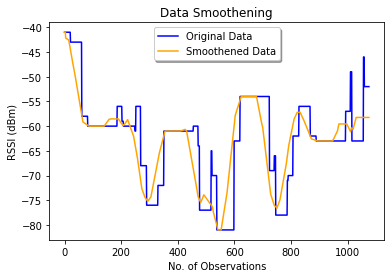

In [25]:
lRSSI=list(train_semi['RSSI(dBm)'])
lMoving_avg=list(train_semi['Moving Average (RSSI)'])
plt.plot(lRSSI, color="blue", label="Original Data")
plt.plot(lMoving_avg, color="orange", label="Smoothened Data")
plt.title("Data Smoothening")
plt.xlabel("No. of Observations")
plt.ylabel("RSSI (dBm)")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

Visualising the Data Points:

Plotting the Reference Points and the Access Points given in the dataset.

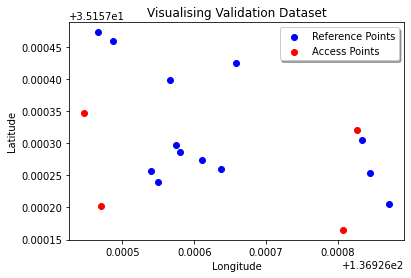

In [26]:
lat_RP = set(test_semi['Latitude_OP'])
long_RP = set(test_semi['Longitude_OP'])
lat_AP = set(test_semi['Latitude_AP'])
long_AP = set(test_semi['Longitude_AP'])
plt.scatter(x=list(long_RP),y=list(lat_RP), color="blue", label="Reference Points")
plt.scatter(x=list(long_AP),y=list(lat_AP), color="red", label="Access Points")
plt.title("Visualising Validation Dataset")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

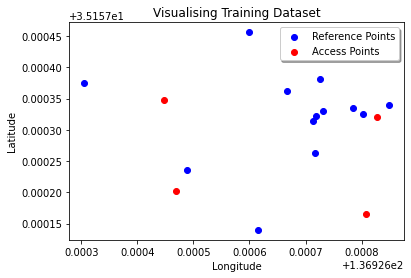

In [27]:
lat_RP = set(train_semi['Latitude_OP'])
long_RP = set(train_semi['Longitude_OP'])
lat_AP = set(train_semi['Latitude_AP'])
long_AP = set(train_semi['Longitude_AP'])
plt.scatter(x=list(long_RP),y=list(lat_RP), color="blue", label="Reference Points")
plt.scatter(x=list(long_AP),y=list(lat_AP), color="red", label="Access Points")
plt.title("Visualising Training Dataset")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

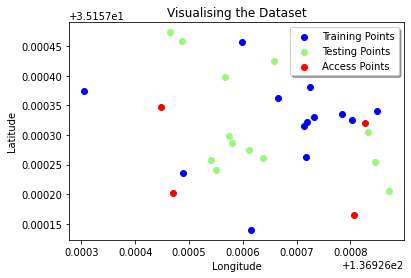

In [28]:
lat_RP_tr = set(train_semi['Latitude_OP'])
long_RP_tr = set(train_semi['Longitude_OP'])
lat_AP_tr = set(train_semi['Latitude_AP'])
long_AP_tr = set(train_semi['Longitude_AP'])
lat_RP_te = set(test_semi['Latitude_OP'])
long_RP_te = set(test_semi['Longitude_OP'])
lat_AP_te = set(test_semi['Latitude_AP'])
long_AP_te = set(test_semi['Longitude_AP'])
plt.scatter(x=list(long_RP_tr),y=list(lat_RP_tr), color="blue", label="Training Points")
plt.scatter(x=list(long_RP_te),y=list(lat_RP_te), color='xkcd:light green', label="Testing Points")
plt.scatter(x=list(long_AP),y=list(lat_AP), color="red", label="Access Points")
plt.title("Visualising the Dataset")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

##Models

At first, we create a Baseline Model using mathematical relationship between distance and RSSI. This model and its results will serve as reference for other ML model's performance


### Baseline Model

In [29]:
test_semi['Baseline Dist'] = 10.43*(10**((-61-test_semi['RSSI(dBm)'])/27))
test_semi['Baseline Dist'].values[test_semi['Baseline Dist'].values>test_semi['Distance'].max()]=test_semi['Distance'].max()

Results of Baseline Model:

In [30]:
dist_err=((test_semi['Distance']-test_semi['Baseline Dist'])**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
print("MEAN DISTANCE ERROR USING BASELINE MODEL :", dist_err.mean(),'m')
print("MAXIMUM DISTANCE ERROR USING BASELINE MODEL :", dist_err.max(),'m')

MEAN DISTANCE ERROR USING BASELINE MODEL : 12.131676973077862 m
MAXIMUM DISTANCE ERROR USING BASELINE MODEL : 32.460504981009464 m


In [31]:
count = len([i for i in dist_err if i  < 2])
low_error = count / len(dist_err) * 100
print("Percentage of data with less than 2m error : ",low_error,"%")

Percentage of data with less than 2m error :  7.629427792915531 %


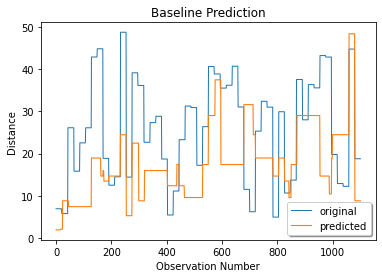

In [32]:
x_ax = range(len(test_semi['Baseline Dist']))
plt.plot(x_ax, test_semi['Distance'], linewidth=1, label="original")
plt.plot(x_ax, test_semi['Baseline Dist'], linewidth=1.1, label="predicted")
plt.title("Baseline Prediction")
plt.xlabel('Observation Number')
plt.ylabel('Distance')
plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
plt.show() 

For Machine Learning model development we follow two main concepts
1. RSSI Distance Estimation
2. RSSI Fingerprinting

### 1. RSSI Distance Estimation (Multilateration)

RSSI distance estimation is solely dependent on a clear correlation between distance and RSSI value. As mentioned previously clear correlation is not present, thereby giving us considerable distance error between the predicted location and actual location.

For performing the same we have tried several algorithms, the following have yielded the best results:

### Linear Regression using Polynomial Features of Degree 2:


Since from the formula of RSSI and distance :

![picture](https://drive.google.com/uc?export=view&id=15tuh-QXcKEVx1P8EW9MuWRd_lJlTpywg)

where n=2, an inverse square law exists between RSSI and distance, thereby motivating us to use the same.

The following illustrate the results obtained:

In [33]:
trainX_final = train_semi[['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4]]
trainY_final = train_semi[['Latitude_OP','Longitude_OP','Distance']]
testX_final = test_semi[['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4]]
testY_final = test_semi[['Latitude_OP','Longitude_OP','Distance']]
mm_scaler = MinMaxScaler()
train_X = pd.DataFrame(mm_scaler.fit_transform(trainX_final),columns=['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', '1', '2', '3', '4'])
test_X = pd.DataFrame(mm_scaler.transform(testX_final),columns=['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', '1', '2', '3', '4'])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,


####Estimation of Distance of RP from AP using Linear Regression with Polynomial Feature of Degree 2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


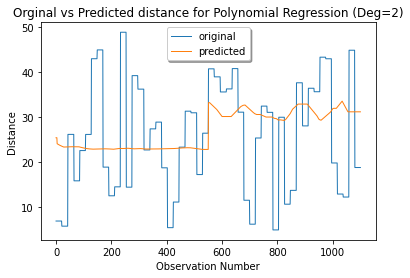

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

polyfeat = PolynomialFeatures(degree=2)
newtrain_X = polyfeat.fit_transform(train_X[['Channel', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)']])
newtest_X = polyfeat.transform(test_X[['Channel', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)']])

model1 = LinearRegression(normalize=True, fit_intercept=False)
model1.fit(newtrain_X, trainY_final['Distance'])
pred_y = model1.predict(newtest_X)

dist_err=((testY_final['Distance']-pred_y)**2)**0.5
df_error = pd.DataFrame(dist_err)
df_error.clip(upper=pd.Series({'Distance': 38}), axis=1, inplace=True)

plt.plot(testY_final['Distance'], linewidth=1, label="original")
plt.plot(pred_y, linewidth=1, label="predicted")
plt.title("Orginal vs Predicted distance for Polynomial Regression (Deg=2)")
plt.xlabel('Observation Number')
plt.ylabel('Distance')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show() 

Results obtained are as follows:

In [35]:
print("MEAN DISTANCE ERROR USING POLYNOMIAL REGRESSOR (DEGREE 2): ", df_error['Distance'].mean(),"m")
print("MAXIMUM DISTANCE ERROR USING POLYNOMIAL REGRESSOR(DEGREE 2): ", df_error['Distance'].max(),"m")

MEAN DISTANCE ERROR USING POLYNOMIAL REGRESSOR (DEGREE 2):  10.0736354919281 m
MAXIMUM DISTANCE ERROR USING POLYNOMIAL REGRESSOR(DEGREE 2):  25.791606937720367 m


In [36]:
count = len([i for i in df_error['Distance'] if i  < 2])
low_error = count / len(df_error['Distance']) * 100
print("Percentage of data with less than 2m error : ",low_error,"%")

Percentage of data with less than 2m error :  11.807447774750226 %


####Estimation of Latitude and Longitude using Linear Regression with Polynomial Feature of Degree 2

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


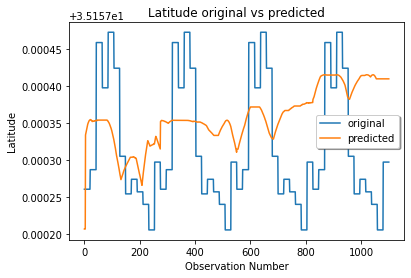

In [37]:
polyfeat = PolynomialFeatures(degree=2)
newtrain_X = polyfeat.fit_transform(train_X[['Latitude_AP','Longitude_AP','Channel', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)','1','2','3','4']])
newtest_X = polyfeat.transform(test_X[['Latitude_AP','Longitude_AP','Channel', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)','1','2','3','4']])

model2 = LinearRegression(normalize=True, fit_intercept=False)
model2.fit(newtrain_X, trainY_final[['Latitude_OP','Longitude_OP']])
pred_y = model2.predict(newtest_X)

pred = pd.DataFrame(pred_y, columns = ['Latitude','Longitude'])
pred['dist_err'] = (((pred['Latitude']-testY_final['Latitude_OP'])*111000)**2 + (((pred['Longitude']-testY_final['Longitude_OP'])*111000)**2))**0.5
pred.clip(upper=pd.Series({'dist_err': 38}), axis=1,inplace=True)

plt.plot(testY_final[['Latitude_OP']],label="original")
plt.plot(pred_y[:,0],label="predicted")
plt.title("Latitude original vs predicted")
plt.xlabel("Observation Number")
plt.ylabel("Latitude")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

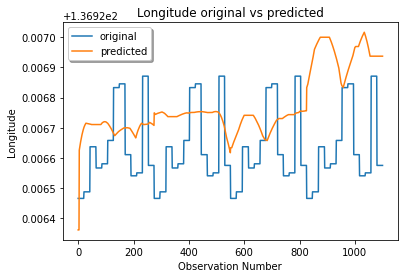

In [38]:
plt.plot(testY_final[['Longitude_OP']],label="original")
plt.plot(pred_y[:,1],label="predicted")
plt.title("Longitude original vs predicted")
plt.xlabel("Observation Number")
plt.ylabel("Longitude")
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show()

Results Obtained

In [39]:
print("MEAN DISTANCE ERROR USING POLYNOMIAL REGRESSOR (DEGREE 2): ", pred['dist_err'].mean(),"m")
print("MAXIMUM DISTANCE ERROR USING POLYNOMIAL REGRESSOR(DEGREE 2): ", pred['dist_err'].max(),"m")

MEAN DISTANCE ERROR USING POLYNOMIAL REGRESSOR (DEGREE 2):  22.529960865882906 m
MAXIMUM DISTANCE ERROR USING POLYNOMIAL REGRESSOR(DEGREE 2):  38.0 m


In [40]:
count = len([i for i in pred['dist_err'] if i  < 2])
low_error = count / len(pred['dist_err']) * 100
print("Percentage of data with less than 2m error : ",low_error,"%")

Percentage of data with less than 2m error :  0.0 %


###AdaBoost

As Adaptive Boosting follows an ensemble approach it significantly improves the results from Linear Regressor, thus motivating us to put it to use.

We created 4 models each for each AP estimating the distance of the RP from the AP.

####Distance Estimation using AdaBoost

In [41]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error

mm_scaler = MinMaxScaler()
train_semiX = pd.DataFrame(mm_scaler.fit_transform(train_semi[['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4]]),columns=['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4])
test_semiX = pd.DataFrame(mm_scaler.transform(test_semi[['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4]]),columns=['Latitude_AP', 'Longitude_AP', 'Channel', 'RSSI(dBm)', 'Hight Difference(m)', 'Outdoor', 'Moving Average (RSSI)', 1, 2, 3, 4])

ap01_dat_tr = pd.concat([train_semiX[train_semiX[1]==1],(train_semi[train_semi[1]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap02_dat_tr = pd.concat([train_semiX[train_semiX[2]==1],(train_semi[train_semi[2]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap03_dat_tr = pd.concat([train_semiX[train_semiX[3]==1],(train_semi[train_semi[3]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap04_dat_tr = pd.concat([train_semiX[train_semiX[4]==1],(train_semi[train_semi[4]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap01_dat_te = pd.concat([test_semiX[test_semiX[1]==1],(test_semi[test_semi[1]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap02_dat_te = pd.concat([test_semiX[test_semiX[2]==1],(test_semi[test_semi[2]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap03_dat_te = pd.concat([test_semiX[test_semiX[3]==1],(test_semi[test_semi[3]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap04_dat_te = pd.concat([test_semiX[test_semiX[4]==1],(test_semi[test_semi[4]==1])[['Distance','Latitude_OP','Longitude_OP']]],axis=1).reset_index(drop=True)
ap01_datX_tr = ap01_dat_tr[['Outdoor','Moving Average (RSSI)']]
ap01_datY_tr = ap01_dat_tr[['Distance']]
ap02_datX_tr = ap02_dat_tr[['Outdoor','Moving Average (RSSI)']]
ap02_datY_tr = ap02_dat_tr[['Distance']]
ap03_datX_tr = ap03_dat_tr[['Outdoor','Moving Average (RSSI)']]
ap03_datY_tr = ap03_dat_tr[['Distance']]
ap04_datX_tr = ap04_dat_tr[['Outdoor','Moving Average (RSSI)']]
ap04_datY_tr = ap04_dat_tr[['Distance']]
ap01_datX_te = ap01_dat_te[['Outdoor','Moving Average (RSSI)']]
ap01_datY_te = ap01_dat_te[['Distance']]
ap02_datX_te = ap02_dat_te[['Outdoor','Moving Average (RSSI)']]
ap02_datY_te = ap02_dat_te[['Distance']]
ap03_datX_te = ap03_dat_te[['Outdoor','Moving Average (RSSI)']]
ap03_datY_te = ap03_dat_te[['Distance']]
ap04_datX_te = ap04_dat_te[['Outdoor','Moving Average (RSSI)']]
ap04_datY_te = ap04_dat_te[['Distance']]
polyfeat = PolynomialFeatures(degree=2)
ap01_datX_tr = polyfeat.fit_transform(ap01_datX_tr)
ap01_datX_te = polyfeat.transform(ap01_datX_te)
polyfeat = PolynomialFeatures(degree=2)
ap02_datX_tr = polyfeat.fit_transform(ap02_datX_tr)
ap02_datX_te = polyfeat.transform(ap02_datX_te)
polyfeat = PolynomialFeatures(degree=2)
ap03_datX_tr = polyfeat.fit_transform(ap03_datX_tr)
ap03_datX_te = polyfeat.transform(ap03_datX_te)
polyfeat = PolynomialFeatures(degree=2)
ap04_datX_tr = polyfeat.fit_transform(ap04_datX_tr)
ap04_datX_te = polyfeat.transform(ap04_datX_te)

ada_AP1 = AdaBoostRegressor(n_estimators=50)
ada_AP1.fit(ap01_datX_tr,ap01_datY_tr)
prediction = ada_AP1.predict(ap01_datX_te)
prediction = prediction.reshape(-1,1)

total_dist_err = []
dist=[]
dist=dist+list(prediction[:,0])

dist_err=((ap01_datY_te-prediction)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err.clip(upper=pd.Series({'Distance': 38}), axis=1,inplace=True)
total_dist_err += list(dist_err.values)

ada_AP2 = AdaBoostRegressor(n_estimators=50)
ada_AP2.fit(ap02_datX_tr,ap02_datY_tr)
prediction = ada_AP2.predict(ap02_datX_te)
prediction = prediction.reshape(-1,1)

dist=dist+list(prediction)
dist_err=((ap02_datY_te-prediction)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err.clip(upper=pd.Series({'Distance': 38}), axis=1,inplace=True)
total_dist_err += list(dist_err.values)

ada_AP3 = AdaBoostRegressor(n_estimators=50)
ada_AP3.fit(ap03_datX_tr,ap03_datY_tr)
prediction = ada_AP3.predict(ap03_datX_te)
prediction = prediction.reshape(-1,1)

dist=dist+list(prediction[:,0])
dist_err=((ap03_datY_te-prediction)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err.clip(upper=pd.Series({'Distance': 38}), axis=1,inplace=True)
total_dist_err += list(dist_err.values)

ada_AP4 = AdaBoostRegressor(n_estimators=50)
ada_AP4.fit(ap04_datX_tr,ap04_datY_tr)
prediction = ada_AP4.predict(ap04_datX_te)
prediction = prediction.reshape(-1,1)

dist=dist+list(prediction[:,0])
dist_err=((ap04_datY_te-prediction)**2)**0.5
df_error = pd.DataFrame(dist_err, columns = ['Distance Error'])
dist_err.clip(upper=pd.Series({'Distance': 38}), axis=1,inplace=True)
total_dist_err += list(dist_err.values)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1679: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3

Results obtained

In [42]:
adamean=sum(total_dist_err)/len(total_dist_err)
adamax=max(total_dist_err)
print("MEAN DISTANCE ERROR USING ADABOOST REGRESSOR: ", adamean[0],'m')
print("MAXIMUM DISTANCE ERROR USING ADABOOST REGRESSOR: ",adamax[0],'m')

MEAN DISTANCE ERROR USING ADABOOST REGRESSOR:  14.175428476665237 m
MAXIMUM DISTANCE ERROR USING ADABOOST REGRESSOR:  34.413591805764185 m


In [43]:
count = len([i for i in total_dist_err if i  < 2])
low_error = count / len(total_dist_err) * 100
print("Percentage of data with less than 2m error : ",low_error,'%')

Percentage of data with less than 2m error :  5.812897366030881 %


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


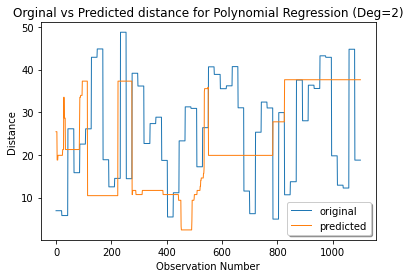

In [44]:
x_ax = range(len(dist))
plt.plot(x_ax, testY_final['Distance'], linewidth=1, label="original")
plt.plot(x_ax, dist, linewidth=1, label="predicted")
plt.title("Orginal vs Predicted distance for Polynomial Regression (Deg=2)")
plt.ylabel('Distance')
plt.xlabel('Observation Number')
plt.legend(loc='best',fancybox=True, shadow=True)
# plt.grid(True)
plt.show() 

####Direct estimation of Latitude and Longitude using AdaBoost

In this case we trained 8 different models for the 4 different APs.
Two models for each AP for predicting Latitude and Longitude of the reference points/observation points respectively.

In [45]:
ap01_datX_tr = ap01_dat_tr[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap01_datY_tr = ap01_dat_tr[['Latitude_OP','Longitude_OP']]
ap02_datX_tr = ap02_dat_tr[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap02_datY_tr = ap02_dat_tr[['Latitude_OP','Longitude_OP']]
ap03_datX_tr = ap03_dat_tr[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap03_datY_tr = ap03_dat_tr[['Latitude_OP','Longitude_OP']]
ap04_datX_tr = ap04_dat_tr[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap04_datY_tr = ap04_dat_tr[['Latitude_OP','Longitude_OP']]
ap01_datX_te = ap01_dat_te[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap01_datY_te = ap01_dat_te[['Latitude_OP','Longitude_OP']]
ap02_datX_te = ap02_dat_te[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap02_datY_te = ap02_dat_te[['Latitude_OP','Longitude_OP']]
ap03_datX_te = ap03_dat_te[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap03_datY_te = ap03_dat_te[['Latitude_OP','Longitude_OP']]
ap04_datX_te = ap04_dat_te[['Latitude_AP','Longitude_AP','Outdoor','Moving Average (RSSI)']]
ap04_datY_te = ap04_dat_te[['Latitude_OP','Longitude_OP']]

ada_AP1_Lat = AdaBoostRegressor(n_estimators=25)
ada_AP1_Lat.fit(ap01_datX_tr,ap01_datY_tr['Latitude_OP'])
prediction1_Lat = ada_AP1_Lat.predict(ap01_datX_te)
prediction1_Lat = pd.DataFrame(prediction1_Lat.reshape(-1,1),columns=['Latitude'])
ada_AP1_Lon = AdaBoostRegressor(n_estimators=25)
ada_AP1_Lon.fit(ap01_datX_tr,ap01_datY_tr['Longitude_OP'])
prediction1_Lon = ada_AP1_Lon.predict(ap01_datX_te)
prediction1_Lon = pd.DataFrame(prediction1_Lon.reshape(-1,1),columns=['Longitude'])

total_dist_err = []
pred1 = pd.concat([prediction1_Lat,prediction1_Lon],axis=1)
pred['dist_err'] = (((pred1['Latitude']-ap01_datY_tr['Latitude_OP'])*111000)**2 + (((pred1['Longitude']-ap01_datY_tr['Longitude_OP'])*111000)**2))**0.5
pred.clip(upper=pd.Series({'dist_err': 38}), axis=1,inplace=True)
total_dist_err += list(dist_err.values)

ada_AP2_Lat = AdaBoostRegressor(n_estimators=25)
ada_AP2_Lat.fit(ap02_datX_tr,ap02_datY_tr['Latitude_OP'])
prediction2_Lat = ada_AP2_Lat.predict(ap02_datX_te)
prediction2_Lat = pd.DataFrame(prediction2_Lat.reshape(-1,1),columns=['Latitude'])
ada_AP2_Lon = AdaBoostRegressor(n_estimators=25)
ada_AP2_Lon.fit(ap02_datX_tr,ap01_datY_tr['Longitude_OP'])
prediction2_Lon = ada_AP2_Lon.predict(ap02_datX_te)
prediction2_Lon = pd.DataFrame(prediction2_Lon.reshape(-1,1),columns=['Longitude'])

pred2 = pd.concat([prediction2_Lat,prediction2_Lon],axis=1)
pred['dist_err'] = (((pred2['Latitude']-ap02_datY_tr['Latitude_OP'])*111000)**2 + (((pred2['Longitude']-ap02_datY_tr['Longitude_OP'])*111000)**2))**0.5
pred.clip(upper=pd.Series({'dist_err': 38}), axis=1,inplace=True)
total_dist_err += list(dist_err.values)

ada_AP3_Lat = AdaBoostRegressor(n_estimators=25)
ada_AP3_Lat.fit(ap03_datX_tr,ap03_datY_tr['Latitude_OP'])
prediction3_Lat = ada_AP3_Lat.predict(ap03_datX_te)
prediction3_Lat = pd.DataFrame(prediction3_Lat.reshape(-1,1),columns=['Latitude'])
ada_AP3_Lon = AdaBoostRegressor(n_estimators=25)
ada_AP3_Lon.fit(ap03_datX_tr,ap03_datY_tr['Longitude_OP'])
prediction3_Lon = ada_AP3_Lon.predict(ap03_datX_te)
prediction3_Lon = pd.DataFrame(prediction3_Lon.reshape(-1,1),columns=['Longitude'])

pred3 = pd.concat([prediction3_Lat,prediction3_Lon],axis=1)
pred['dist_err'] = (((pred3['Latitude']-ap03_datY_tr['Latitude_OP'])*111000)**2 + (((pred3['Longitude']-ap03_datY_tr['Longitude_OP'])*111000)**2))**0.5
pred.clip(upper=pd.Series({'dist_err': 38}), axis=1,inplace=True)
total_dist_err += list(dist_err.values)

ada_AP4_Lat = AdaBoostRegressor(n_estimators=25)
ada_AP4_Lat.fit(ap04_datX_tr,ap04_datY_tr['Latitude_OP'])
prediction4_Lat = ada_AP4_Lat.predict(ap04_datX_te)
prediction4_Lat = pd.DataFrame(prediction4_Lat.reshape(-1,1),columns=['Latitude'])
ada_AP4_Lon = AdaBoostRegressor(n_estimators=25)
ada_AP4_Lon.fit(ap04_datX_tr,ap04_datY_tr['Longitude_OP'])
prediction4_Lon = ada_AP4_Lon.predict(ap04_datX_te)
prediction4_Lon = pd.DataFrame(prediction4_Lon.reshape(-1,1),columns=['Longitude'])

pred4 = pd.concat([prediction4_Lat,prediction4_Lon],axis=1)
pred['dist_err'] = (((pred4['Latitude']-ap04_datY_tr['Latitude_OP'])*111000)**2 + (((pred4['Longitude']-ap04_datY_tr['Longitude_OP'])*111000)**2))**0.5
pred.clip(upper=pd.Series({'dist_err': 38}), axis=1,inplace=True)
total_dist_err += list(dist_err.values)

Results obtained

In [46]:
adamean=sum(total_dist_err)/len(total_dist_err)
adamax=max(total_dist_err)
print("MEAN DISTANCE ERROR USING ADABOOST REGRESSOR: ", adamean[0],'m')
print("MAXIMUM DISTANCE ERROR USING ADABOOST REGRESSOR: ",adamax[0],'m')

MEAN DISTANCE ERROR USING ADABOOST REGRESSOR:  12.979052804546736 m
MAXIMUM DISTANCE ERROR USING ADABOOST REGRESSOR:  26.991121482947385 m


In [47]:
count = len([i for i in total_dist_err if i  < 2])
low_error = count / len(total_dist_err) * 100
print("Percentage of data with less than 2m error : ",low_error,'%')

Percentage of data with less than 2m error :  15.636363636363637 %


### 2. RSSI Fingerprinting

Fingerprinting of RSSI gives us a map of the RSSI throughout the area of inspection, it is effective for both indoor and outdoor experimental conditions. However, many data points uniformly spread throughout the area, gives the model a better understanding, which is not available in this scenario.

### KNN - Regressor

We have used KNN regressor to predict reference point locations using the concept of RSSI Fingerprinting.

In [48]:
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

rmse_val = [] #to store rmse values for different k
for K in range(13):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(newtrain_X, trainY_final[['Latitude_OP','Longitude_OP']])  #fit the model
    pred=model.predict(newtest_X) #make prediction on test set
    error = sqrt(mean_squared_error(testY_final[['Latitude_OP','Longitude_OP']],pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.00014264030700196525
RMSE value for k=  2 is: 0.0001349883207070322
RMSE value for k=  3 is: 0.00013347786765541687
RMSE value for k=  4 is: 0.00013596747987660657
RMSE value for k=  5 is: 0.0001352648427235548
RMSE value for k=  6 is: 0.0001351045857036459
RMSE value for k=  7 is: 0.0001342199386390155
RMSE value for k=  8 is: 0.00013576804535908075
RMSE value for k=  9 is: 0.0001366785072172612
RMSE value for k=  10 is: 0.00013611592275921666
RMSE value for k=  11 is: 0.00013672408536584632
RMSE value for k=  12 is: 0.00013615789458791352
RMSE value for k=  13 is: 0.00013672629676039693


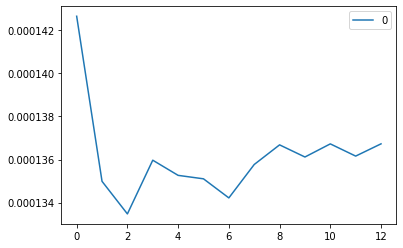

In [49]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

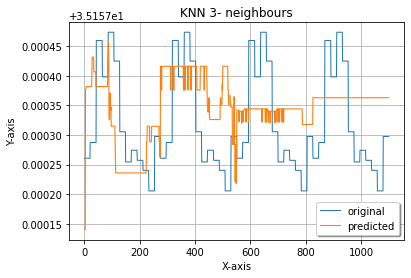

In [50]:
model = neighbors.KNeighborsRegressor(n_neighbors = 3)
model.fit(newtrain_X, trainY_final[['Latitude_OP','Longitude_OP']])  #fit the model
pred_knn=model.predict(newtest_X) #make prediction on test set

x_ax = range(len(testY_final[['Latitude_OP']]))
plt.plot(x_ax, testY_final[['Latitude_OP']], linewidth=1, label="original")
plt.plot(x_ax, pred_knn[:,0], linewidth=1.1, label="predicted")
plt.title("KNN 3- neighbours")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

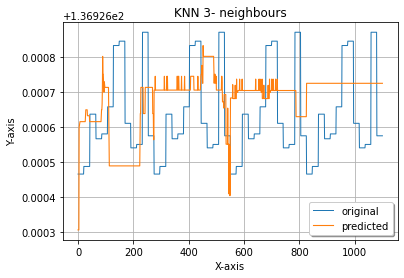

In [51]:
x_ax = range(len(testY_final[['Longitude_OP']]))
plt.plot(x_ax, testY_final[['Longitude_OP']], linewidth=1, label="original")
plt.plot(x_ax, pred_knn[:,1], linewidth=1.1, label="predicted")
plt.title("KNN 3- neighbours")
plt.xlabel('X-axis')
plt.ylabel('Y-axis')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.grid(True)
plt.show() 

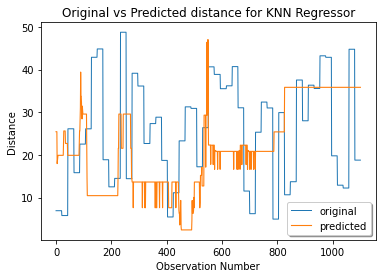

In [52]:
pred = pd.DataFrame(pred_knn, columns = ['Latitude','Longitude'])
pred['dist_err'] = (((pred['Latitude']-testY_final['Latitude_OP'])*111000)**2 + (((pred['Longitude']-testY_final['Longitude_OP'])*111000)**2))**0.5
pred['distance'] = (((pred['Latitude']-test_semi['Latitude_AP'])*111000)**2 + (((pred['Longitude']-test_semi['Longitude_AP'])*111000)**2))**0.5
x_ax = range(len(test_semi['Distance']))
plt.plot(x_ax, test_semi['Distance'], linewidth=1, label="original")
plt.plot(x_ax, pred['distance'], linewidth=1.1, label="predicted")
plt.title("Original vs Predicted distance for KNN Regressor")
plt.xlabel('Observation Number')
plt.ylabel('Distance')
plt.legend(loc='best',fancybox=True, shadow=True)
plt.show() 

In [53]:
pred.clip(upper=pd.Series({'dist_err': 38}), axis=1,inplace=True)

Results

In [54]:
knnmean=pred['dist_err'].mean()
knnmax=pred['dist_err'].max()
print("MEAN DISTANCE ERROR USING KNN REGRESSOR: ", knnmean,'m')
print("MAXIMUM DISTANCE ERROR USING KNN REGRESSOR: ",knnmax,'m')

MEAN DISTANCE ERROR USING KNN REGRESSOR:  19.224908935684294 m
MAXIMUM DISTANCE ERROR USING KNN REGRESSOR:  38.0 m


In [55]:
count = len([i for i in pred['dist_err'] if i  < 2])
low_error = count / len(pred['dist_err']) * 100
print("Percentage of data with less than 2m error : ",low_error,'%')

Percentage of data with less than 2m error :  0.0 %


##Summary

We discovered that the data set downloaded was in relatively clean state and therefore we did not have to clean up the data. However, feature engineering was required to come to the conclusions regarding the data. 

Since the number of Reference point in the training dataset is limited to 13, and is not uniformly distributed over the localisation area, satisfactory results could not be obtained using RSSI fingerprinting technique.

Moreover as RSSI values at the same time instant were sometimes available to 3, sometimes to 4 - estimating the location from multilateration was not possible.

The best result was achieved using AdaBoost Regressor.


## Challenges of using RSSI in Practical Scenario:

RSSI values are highly sensitive to changes in the environment and they vary rapidly, reducing its reliability.

One study by Parameswaran et al. illustrates the same unreliability -

When RSSI was measured from the North of an AP the RSSI vs distance plot obtained is illustrated below:

![picture](https://drive.google.com/uc?export=view&id=1qNSJSlHc3YwT3Z36jCHXKiw8SVN6oE4T)

The same AP when measuring RSSI from the east yielded this RSSI vs distance plot:


![picture](https://drive.google.com/uc?export=view&id=1Sapha1-WAIaVeyihs9S4a7sVap3ptlqj)

This clearly illustrates the unreliability of RSSI when using it for localization.

## Future aspects for improvement

- Use of Link Quality Index, Time of Arrival and Angle of Arrival can be done instead of RSSI for more robust localiztion results, as these parameters are not so heavily influenced by the environment as RSSI.


- Filters such as Kalman Filter and Gaussian Filter can be applied to the data if the data collected is in the form of a Time-Series with changes in Latitude and Longitude. 

- More number of reference points in the data provided would significantly improve the performance of the models.

## References

- Shen, Y., Hwang, B. and Jeong, J.P., 2020. Particle Filtering-Based Indoor Positioning System for Beacon Tag Tracking. IEEE Access, 8, pp.226445-226460.
- Li, G., Geng, E., Ye, Z., Xu, Y., Lin, J. and Pang, Y., 2018. Indoor positioning algorithm based on the improved RSSI distance model. Sensors, 18(9), p.2820.
- Bullmann, M., Fetzer, T., Ebner, F., Ebner, M., Deinzer, F. and Grzegorzek, M., 2020. Comparison of 2.4 GHz WiFi FTM-and RSSI-based indoor positioning methods in realistic scenarios. Sensors, 20(16), p.4515.
- Sung, Y., 2016. RSSI-based distance estimation framework using a Kalman filter for sustainable indoor computing environments. Sustainability, 8(11), p.1136.
- Parameswaran, A.T., Husain, M.I. and Upadhyaya, S., 2009, September. Is rssi a reliable parameter in sensor localization algorithms: An experimental study. In Field failure data analysis workshop (F2DA09) (Vol. 5). IEEE.
Li, G., Geng, E., Ye, Z., Xu, Y., Lin, J., Pang, Y.: Indoor Positioning Algorithm Based on the Improved RSSI Distance Model. Sensors. 18, 2820 (2018).
- Kraus and Fleisch, Electromagnetics, 5th Ed., McGraw-Hill, 1999
Navarro, E., Peuker, B., Quan, M., Clark, A.C. and Jipson, J., 2010. Wi-fi localization using RSSI fingerprinting (Doctoral dissertation, California Polytechnic State University).
- Chan, S. and Sohn, G., 2012. Indoor localization using wi-fi based fingerprinting and trilateration techiques for lbs applications. International Archives of the Photogrammetry, Remote Sensing and Spatial Information Sciences, 38(4), p.C26.
- Choraś, Ryszard S. (2010). [Advances in Intelligent and Soft Computing] Image Processing and Communications Challenges 2 Volume 84 || Evaluation of Smoothing Algorithms for a RSSI-Based Device-Free Passive Localisation. , 10.1007/978-3-642-16295-4(Chapter 52), 469–476. doi:10.1007/978-3-642-16295-4_52

